# Exploratory Data Analysis & Dataset Cleaning

In [1]:
#importing required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random 

In [2]:
#loading csvs
train_data = pd.read_csv('train.csv')
features_data=pd.read_csv('features.csv')
stores_data=pd.read_csv('stores.csv')

In [3]:
train_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [4]:
features_data.head(5)

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
stores_data.head(5)

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [6]:
print(train_data.shape)
print(features_data.shape)
print(stores_data.shape)

(421570, 5)
(8190, 12)
(45, 3)


**Checking for Nan  Values-Preprocessing**

In [7]:
train_data.isna().sum()

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday       0
dtype: int64

In [8]:
features_data.isna().sum()

Store              0
Date               0
Temperature        0
Fuel_Price         0
MarkDown1       4158
MarkDown2       5269
MarkDown3       4577
MarkDown4       4726
MarkDown5       4140
CPI              585
Unemployment     585
IsHoliday          0
dtype: int64

In [9]:
stores_data.isna().sum()

Store    0
Type     0
Size     0
dtype: int64

Nans are present only in Markdown columns of  features dataset.Ideally,the Nans can be replaced by zeroes because it just indicates that there was no markdown offer.Replacing with any other value can lead to misleading results.

**Merging Datasets**

In [10]:
df=train_data.merge(features_data,how='left',on=['Store','Date'])
print(df.shape)
df.head(5)

(421570, 15)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [11]:
df=df.merge(stores_data,how='left',on='Store')
print(df.shape)
df.head(5)

(421570, 17)


,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [12]:
df.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328
min,1.000000,1.000000,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [13]:
#Checking overall data quality
feature_percent_missing = df.isnull().sum()*100/len(df)
feature_data_type = df.dtypes

feature_summary = pd.DataFrame({"Percent_missing": feature_percent_missing.round(2), 
                               "Datatypes": feature_data_type})

feature_summary

,Percent_missing,Datatypes
Store,0.00,int64
Dept,0.00,int64
Date,0.00,object
Weekly_Sales,0.00,float64
IsHoliday_x,0.00,bool
Temperature,0.00,float64
Fuel_Price,0.00,float64
MarkDown1,64.26,float64
MarkDown2,73.61,float64
MarkDown3,67.48,float64


Overall data quality is pretty good.The only erronaoes values are in markdown columns.Also from description of combined dataset,there are negative values in columns-Markdown 2,Markdown 3,Weekly_Sales.

**Cleaning**

In [14]:
#Replacing Nans with zeroes
df_new=df.fillna(0)

Since negative values are found in markdowns and weekly_sales for which we do not have an idcea with what to replace,lets replace with zero.

In [15]:
#Replacing negative values with 0
df_new.loc[df_new['Weekly_Sales'] < 0.0,'Weekly_Sales'] = 0.0
df_new.loc[df_new['MarkDown2'] < 0.0,'MarkDown2'] = 0.0
df_new.loc[df_new['MarkDown3'] < 0.0,'MarkDown3'] = 0.0


In [16]:
df_new.head(1)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.5,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,False,A,151315


In [17]:
df_new.describe()

,Store,Dept,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,15981.467250,60.090059,3.361027,2590.074819,880.070274,468.092929,1083.132268,1662.772385,171.201947,7.960289,136727.915739
std,12.785297,30.492054,22711.032446,18.447931,0.458515,6052.385934,5084.520381,5528.872994,3894.529945,4207.629321,39.159276,1.863296,60980.583328
min,1.000000,1.000000,0.000000,-2.060000,2.472000,0.000000,0.000000,0.000000,0.000000,0.000000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2079.650000,46.680000,2.933000,0.000000,0.000000,0.000000,0.000000,0.000000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,7612.030000,62.090000,3.452000,0.000000,0.000000,0.000000,0.000000,0.000000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,20205.852500,74.280000,3.738000,2809.050000,2.200000,4.540000,425.290000,2168.040000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000


In [18]:
#Dropping of column IsHoliday_y
df_new.drop('IsHoliday_y',inplace=True,axis=1)

In [19]:
df_new.head(3)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.0,0.0,0.0,0.0,0.0,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.0,0.0,0.0,0.0,0.0,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.0,0.0,0.0,0.0,0.0,211.289143,8.106,A,151315


**Visualisations**

In [20]:
def scatter(dataset, column):
    plt.figure()
    plt.scatter(dataset[column] , dataset['Weekly_Sales'])
    plt.ylabel('WeeklySales')
    plt.xlabel(column)
    plt.show()

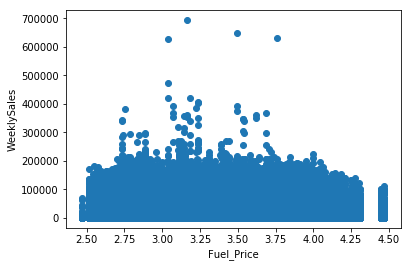

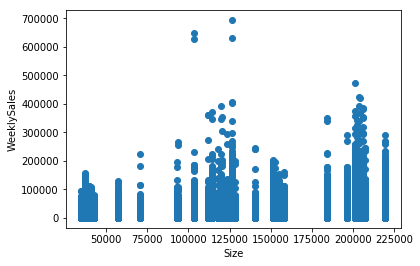

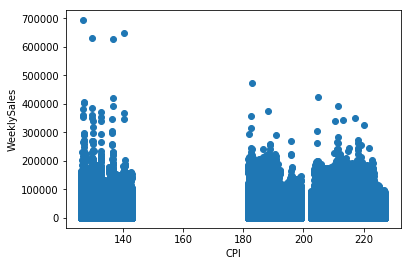

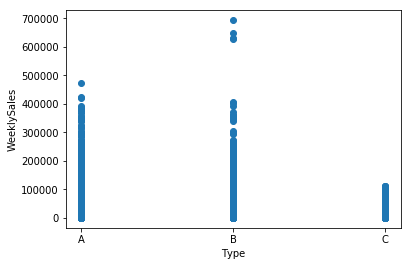

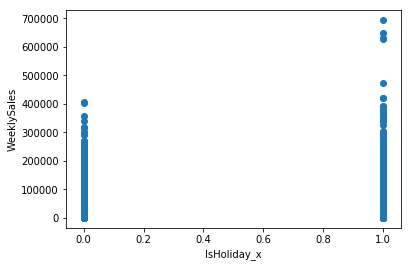

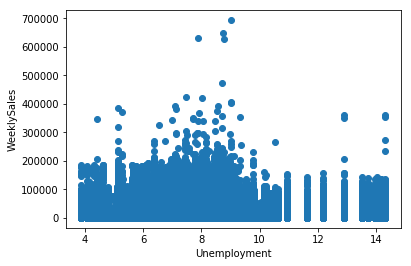

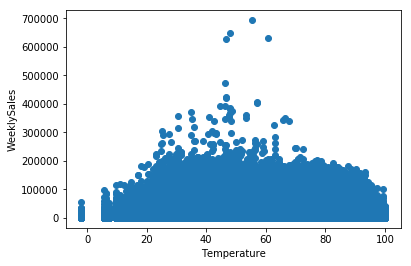

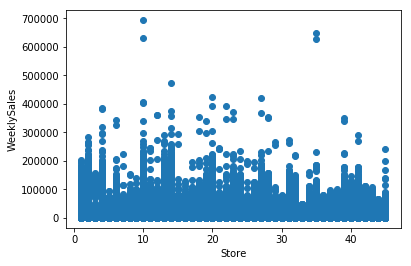

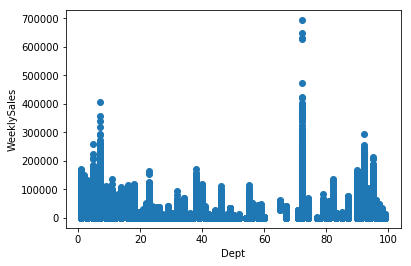

In [21]:
scatter(df_new, 'Fuel_Price')
scatter(df_new, 'Size')
scatter(df_new, 'CPI')
scatter(df_new, 'Type')
scatter(df_new, 'IsHoliday_x')
scatter(df_new, 'Unemployment')
scatter(df_new, 'Temperature')
scatter(df_new, 'Store')
scatter(df_new, 'Dept')

Certain observations from scatter plot are:
* Type B stores have highest weekly sales followed by type A and then type C
* Weekly Sales increases during  Holidays .
* Weekly sales are higher for positive temperatures-summers.

(array([26920., 67084., 46164., 35962., 37517., 79109., 68565., 44053.,
        13319.,  2877.]),
 array([2.472 , 2.6716, 2.8712, 3.0708, 3.2704, 3.47  , 3.6696, 3.8692,
        4.0688, 4.2684, 4.468 ]),
 <a list of 10 Patch objects>)

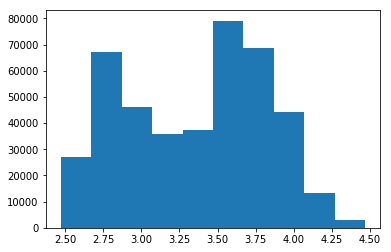

In [22]:
plt.hist(df_new['Fuel_Price'])

In [23]:
df_new['IsHoliday_x'].sum(axis=0)

29661

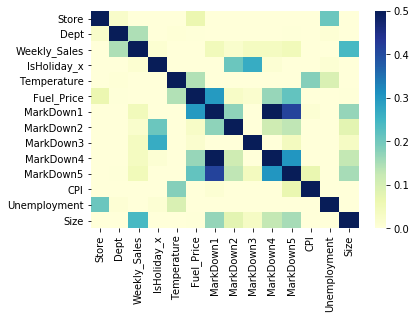

In [24]:
corr = df_new.corr()
sns.heatmap(corr,cmap='YlGnBu',vmax=.5,vmin=0)


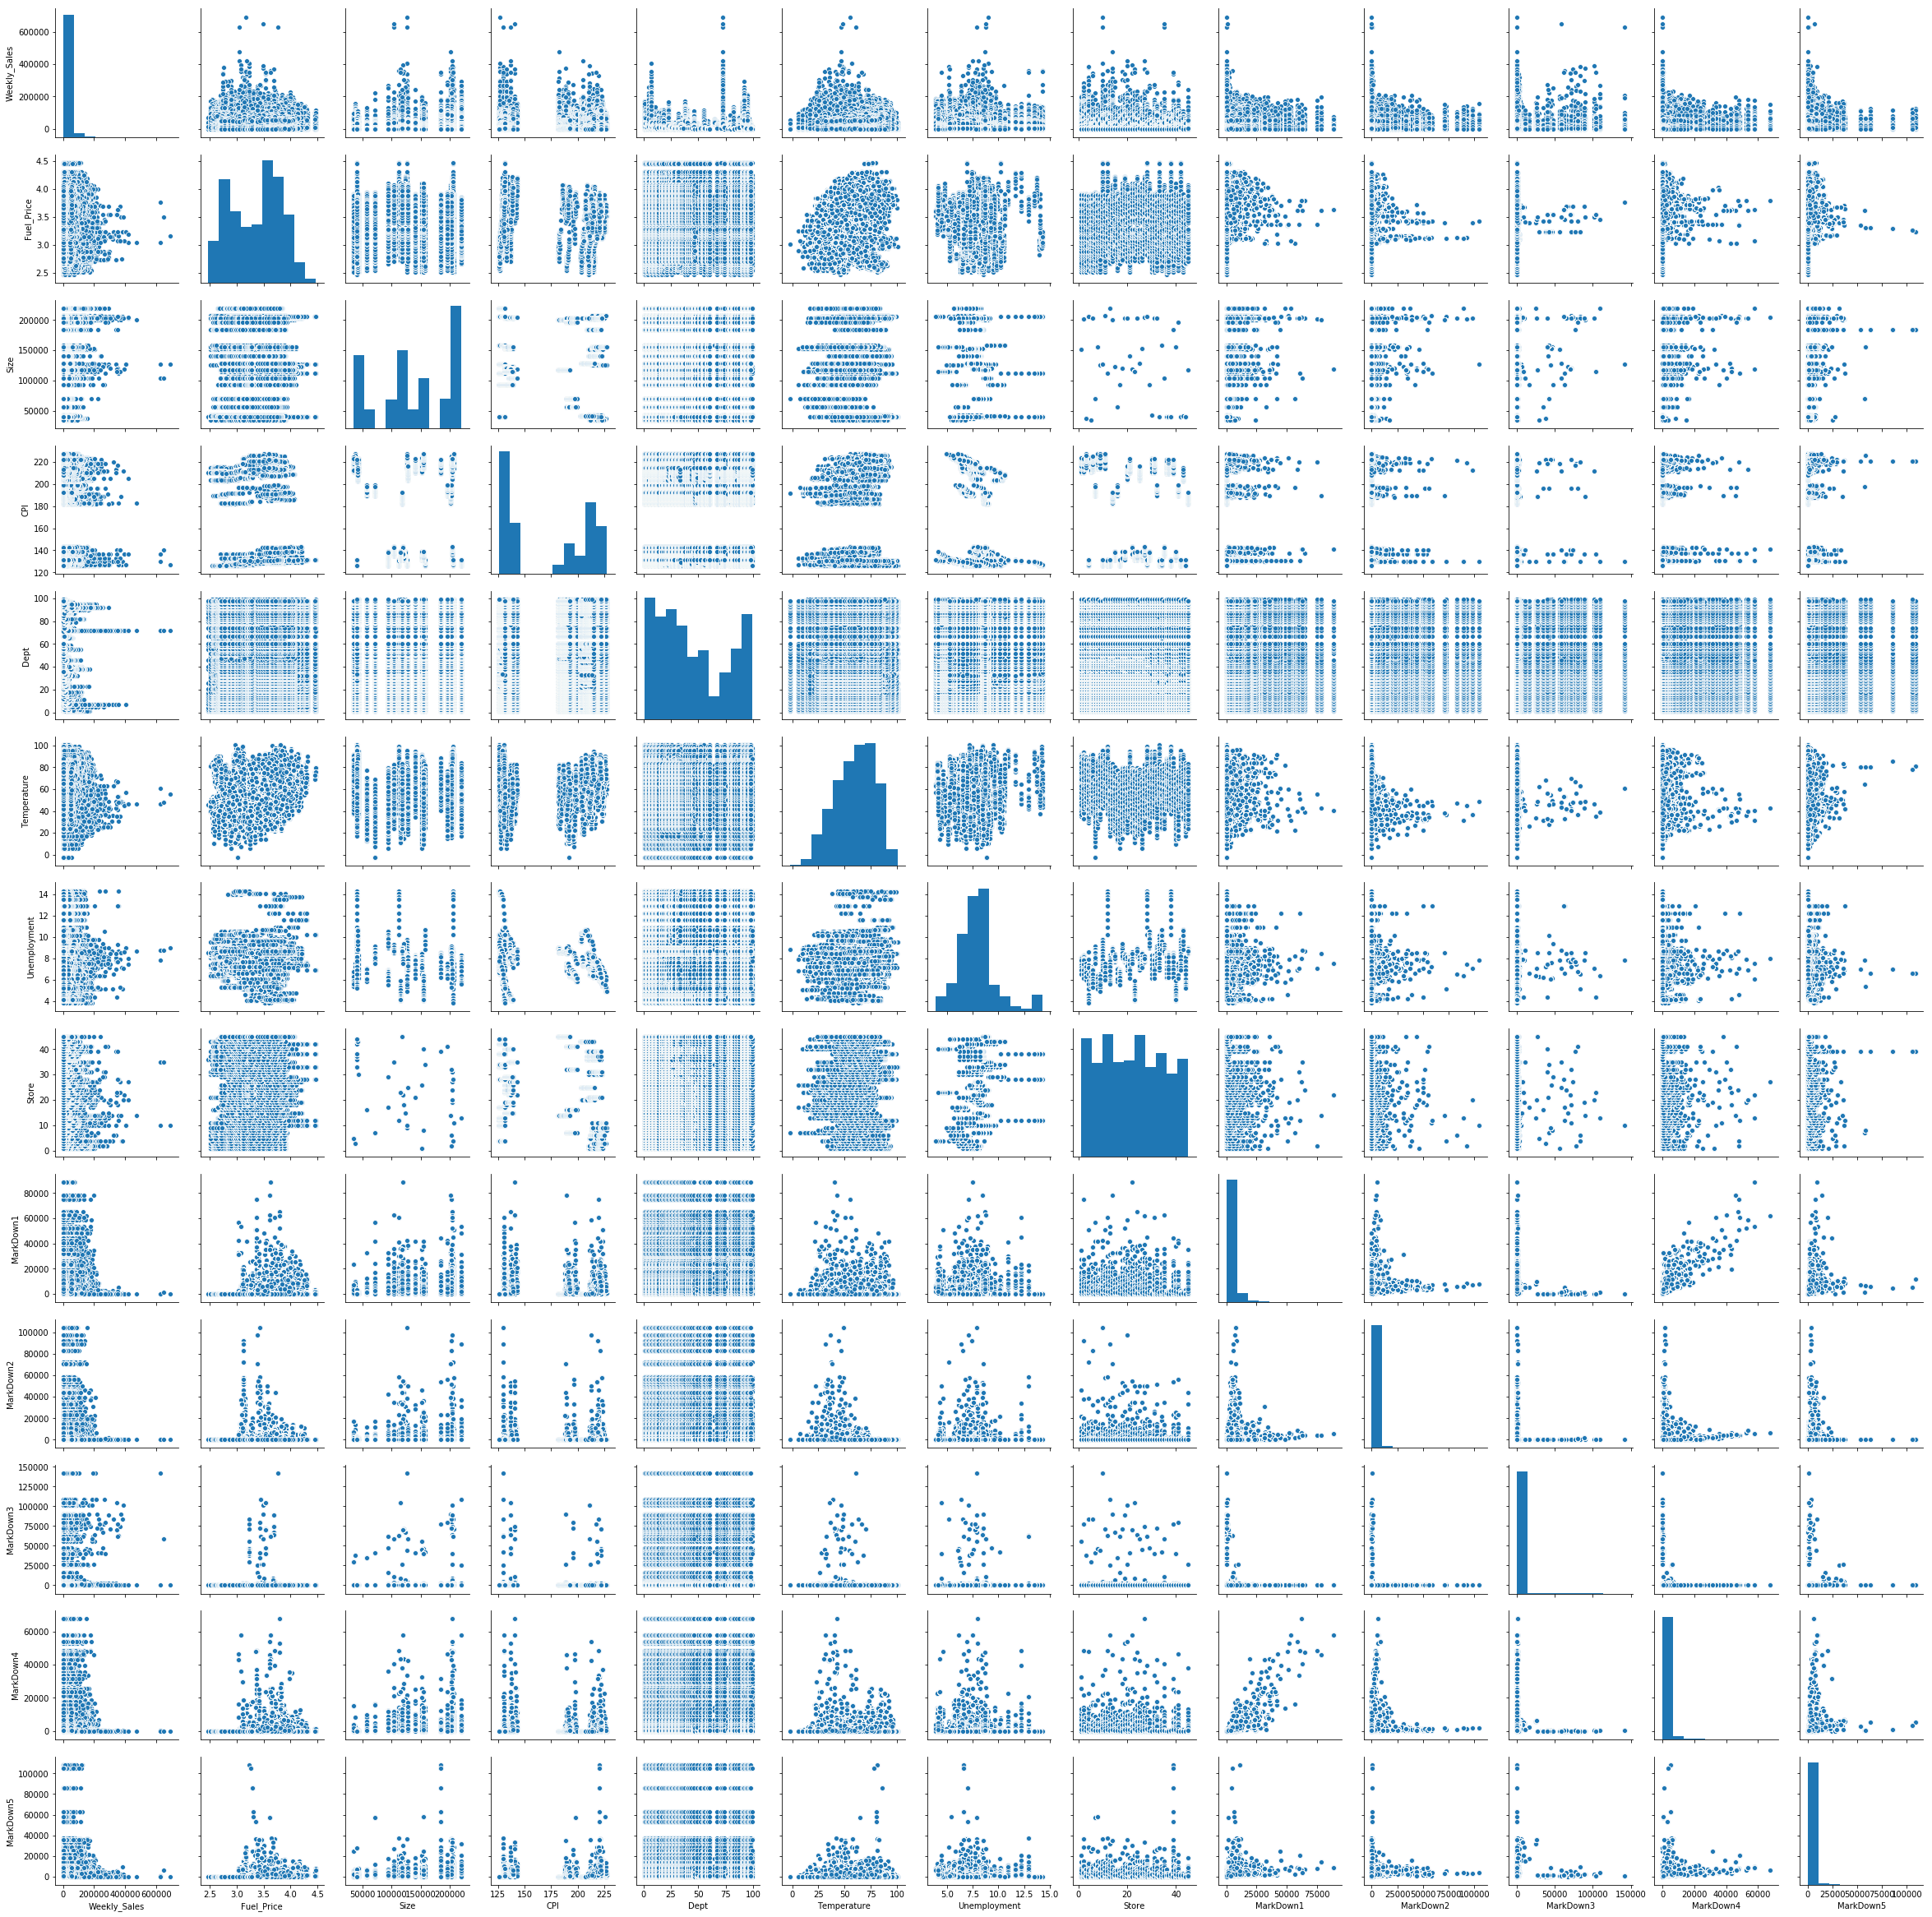

In [25]:
sns.pairplot(df_new, vars=['Weekly_Sales', 'Fuel_Price', 'Size', 'CPI', 'Dept', 'Temperature', 'Unemployment','Store','MarkDown1',
'MarkDown2','MarkDown3','MarkDown4','MarkDown5'])

From the above plots we can observe the following:

* Weekly sales and store size have positive correlation
* Weekly sales and departments have positive correlation

Though there is a positive correlation,it is not a very strong one.We observe few interesting trends and correlation within parameters,
* Holidays and Markdown
* Within Markdown

In [26]:
grouped_data=df_new.groupby(['Store', 'Dept'])


In [27]:
grouped_data.head(5)

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,0.00,0.0,0.00,0.00,0.00,211.242170,8.106,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,0.00,0.0,0.00,0.00,0.00,211.319643,8.106,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,0.00,0.0,0.00,0.00,0.00,211.350143,8.106,A,151315
143,1,2,2010-02-05,50605.27,False,42.31,2.572,0.00,0.0,0.00,0.00,0.00,211.096358,8.106,A,151315
144,1,2,2010-02-12,44682.74,True,38.51,2.548,0.00,0.0,0.00,0.00,0.00,211.242170,8.106,A,151315
145,1,2,2010-02-19,47928.89,False,39.93,2.514,0.00,0.0,0.00,0.00,0.00,211.289143,8.106,A,151315
146,1,2,2010-02-26,44292.87,False,46.63,2.561,0.00,0.0,0.00,0.00,0.00,211.319643,8.106,A,151315
147,1,2,2010-03-05,48397.98,False,46.50,2.625,0.00,0.0,0.00,0.00,0.00,211.350143,8.106,A,151315


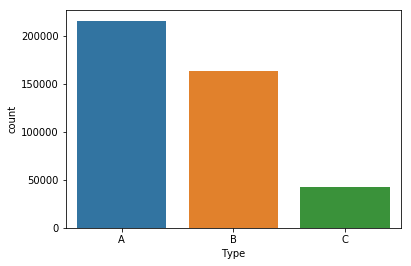

In [28]:
sns.countplot(df_new['Type'])

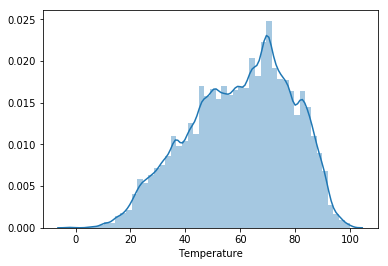

In [29]:
sns.distplot(df_new['Temperature'])

C:\ProgramData\Anaconda3\lib\site-packages\pandas\plotting\_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


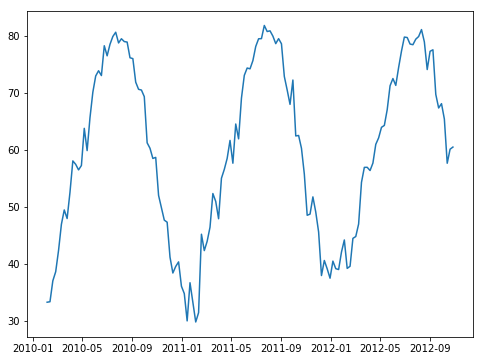

In [30]:
df2 = df_new
df2['dt'] = pd.to_datetime(df_new['Date'])
df_to_plot = df2.groupby(['dt'])['Temperature'].mean()

fig, ax = plt.subplots(1, 1, figsize=(8,6))
sns.lineplot(data=df_to_plot, ax=ax)

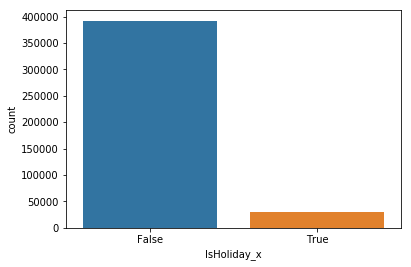

In [31]:
sns.countplot(df_new['IsHoliday_x'])

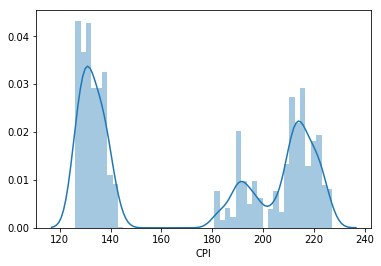

In [32]:
sns.distplot(df_new['CPI'])

In [33]:
grouped_data=df_new.groupby(['Store']).sum()

In [34]:
grouped_data

,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,,,,,,,,,,,,,
1,454749,2.224068e+08,723.0,698891.40,32973.495,29573172.77,8946002.16,4468507.74,13732804.50,1.838647e+07,2.212658e+06,77966.246,1550070860
2,455425,2.753872e+08,722.0,697263.44,32965.318,39058007.29,16088974.79,6226127.85,17427365.75,2.398463e+07,2.207844e+06,78047.128,2071219066
3,370825,5.758793e+07,633.0,644254.39,29087.899,9983368.61,2659078.45,2607992.20,2870236.34,4.116018e+06,1.982524e+06,64838.742,337874112
4,457340,2.995453e+08,727.0,638680.78,33037.189,34440267.52,14187163.51,7054847.27,18897288.62,2.504427e+07,1.321802e+06,61281.203,2114624736
5,371526,4.547612e+07,640.0,622763.37,28984.988,9711211.82,2701824.19,2116352.74,3555011.57,8.236391e+06,1.948972e+06,56662.647,313840125
6,453812,2.237586e+08,721.0,711093.38,32889.398,30781300.32,12819197.58,6812203.29,13598176.50,2.055747e+07,2.221556e+06,67456.037,2067778555
7,432878,8.159950e+07,691.0,386602.68,31628.735,22528699.42,4387009.96,3043294.96,6038559.31,1.245570e+07,1.890624e+06,83808.481,690300306
8,432217,1.299515e+08,696.0,617917.36,31854.516,24957265.11,7973160.77,3668320.89,5996863.33,2.030927e+07,2.171344e+06,60279.688,1534496810
9,355292,7.779117e+07,625.0,599822.28,28586.439,10276462.80,2491808.85,3095154.04,3208143.21,1.194648e+07,1.947935e+06,54050.057,1115761211


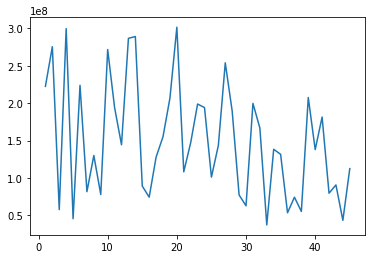

In [35]:
plt.plot(grouped_data['Weekly_Sales'])

In [36]:
print(grouped_data['Weekly_Sales'].min())
print(grouped_data['Weekly_Sales'].max())
print(grouped_data['Weekly_Sales'].mean())

37160325.400000006
301401381.44999975
149717936.63711092


In [37]:
grouped_data.sort_values(by=['Weekly_Sales'])

,Dept,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Store,,,,,,,,,,,,,
33,302780,3.716033e+07,453.0,498189.66,23282.695,782323.96,214348.15,3128.35,9882.51,3.980793e+06,8.351158e+05,55147.635,257469030
44,335081,4.329367e+07,499.0,386422.19,23616.290,1316708.47,205278.63,41156.68,18997.45,2.299423e+06,9.227997e+05,48127.352,286114790
5,371526,4.547612e+07,640.0,622763.37,28984.988,9711211.82,2701824.19,2116352.74,3555011.57,8.236391e+06,1.948972e+06,56662.647,313840125
36,293473,5.341335e+07,437.0,443090.81,19976.749,674564.15,333783.75,1738.90,17295.80,3.090809e+06,1.336463e+06,48906.724,248320020
38,340471,5.515990e+07,510.0,518124.04,26631.026,1116642.69,380173.83,32707.13,52515.63,4.262273e+06,9.477002e+05,96341.264,292197780
3,370825,5.758793e+07,633.0,644254.39,29087.899,9983368.61,2659078.45,2607992.20,2870236.34,4.116018e+06,1.982524e+06,64838.742,337874112
30,336756,6.271701e+07,498.0,492240.25,23083.964,1062739.68,386357.56,32759.21,44951.22,4.971846e+06,1.543332e+06,54553.416,307622128
37,337910,7.420286e+07,499.0,513414.99,23300.409,755867.56,263309.29,48694.70,33956.11,3.755550e+06,1.548374e+06,56558.807,287591460
16,402800,7.425674e+07,673.0,425000.40,30678.772,13270007.44,2473491.40,2656434.58,4333228.17,9.911122e+06,1.829542e+06,61100.003,540111271


The variation across various stores is high.The best performing store is 33 and least perforing store is 20

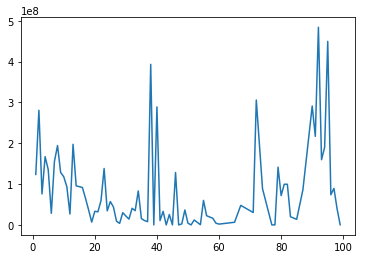

In [38]:
grouped_data=df_new.groupby(['Dept']).sum()
plt.plot(grouped_data['Weekly_Sales'])

In [39]:
print(grouped_data['Weekly_Sales'].min())
print(grouped_data['Weekly_Sales'].max())
print(grouped_data['Weekly_Sales'].mean())

14.32
483943341.8699997
83176631.46506175


In [40]:
grouped_data.sort_values(by=['Weekly_Sales'])

,Store,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
Dept,,,,,,,,,,,,,
43,287,1.432000e+01,1.0,570.27,42.178,43329.04,27548.42,25149.41,17587.47,48834.25,1.657403e+03,113.320,1642426
39,228,1.779800e+02,1.0,866.01,56.962,76855.72,790.34,1547.94,20367.53,44050.07,2.491385e+03,130.531,3174299
78,4504,2.066910e+03,26.0,13088.68,747.800,560957.90,361799.45,133606.36,326137.88,278430.37,3.821044e+04,1947.371,37957074
51,32135,3.101135e+04,85.0,78990.88,4281.453,692492.97,72340.05,36650.69,234521.41,609737.63,2.315732e+05,11281.101,206426426
45,36993,4.549691e+04,145.0,109111.66,6253.609,3589770.78,1821918.89,1112836.10,1666767.24,2322498.75,3.235339e+05,15315.367,291634930
47,12641,4.822513e+04,55.0,36169.89,2123.483,1893770.62,1163032.02,48089.82,811710.29,1115933.53,1.108769e+05,5204.511,99511441
77,3275,4.989164e+04,48.0,6881.83,526.355,983400.99,297285.08,2488317.78,537930.52,986685.56,2.564372e+04,1143.859,23392576
99,18480,3.584093e+05,95.0,54145.32,3096.909,6673089.71,1865893.45,1495462.82,3359624.63,3902160.77,1.545253e+05,6403.674,160868209
54,94294,5.211244e+05,344.0,279133.73,15875.429,13074124.29,4764095.91,2623126.63,5595454.01,8124733.67,8.133483e+05,37474.027,726751511


From the graphs and charts its observed that there is high variation between the sales of each department.Highest sales is in department in 43 and lowest in 92